### Autoencoder
- 객체지향: Model 상속을 통해서 객체로 만들어서 재사용 ,재활용
  - call: 인스턴스된 객체를 함수처럼 사용(functional pradigm) closure
  - __init__ : build
  - model, layer 상속

- 레이어가 적어서 성능이 안 좋음

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64
class AutoEncoder(Model):
    def __init__(self,latent_dim):
        super(AutoEncoder,self).__init__()
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim,activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(784,activation='sigmoid'),  # 이진 분류
            layers.Reshape((28,28))
        ])

    def call(self,x):  # callable
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder1 = AutoEncoder(latent_dim)   # 인스턴스 생성
autoencoder2 = AutoEncoder(latent_dim)   # 인스턴스 생성

In [4]:
AutoEncoder.__base__   # 부모 클래스 : Model

keras.src.models.model.Model

- 모델 상속해서 compile, fit
  - 학습: loss func 최소화
- 구분된 categoial 에 쓰는 loss function
내 자신이실제 결과와 얼마나 다른지


In [5]:
autoencoder1.compile(optimizer='adam',loss='binary_crossentropy') # 이진분류

autoencoder2.compile(optimizer='adam',loss='mean_squared_error') # 회귀모델, mse

  - 머신러닝은 절대적 모델 평가 No
  - binary crossentropy, MSE 기준이 다르기 때문에 절대적 수치 비교하면 안되며 학습의 **변화 정도**만 평가
    - 둘다 학습하다가 어느정도 주춤되기 시작


In [6]:
# 학습 : CPU 약 2 분 소요
# loss='binary_crossentropy'
autoencoder1.fit(x_train,x_train,epochs=10,shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.3577 - val_loss: 0.2863
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2818 - val_loss: 0.2784
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2759 - val_loss: 0.2760
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2736 - val_loss: 0.2748
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2722 - val_loss: 0.2742
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2716 - val_loss: 0.2739
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2714 - val_loss: 0.2733
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2710 - val_loss: 0.2733
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2707 - val_loss: 0.2731
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2708 - val_loss: 0.2729


In [7]:
# 학습 : CPU 약 2분 소요
# loss='mean_squared_error'
autoencoder2.fit(x_train,x_train,epochs=10,shuffle=True,
                validation_data=(x_test,x_test))  # MSE가 loss 최소화가 더 잘 됨

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0392 - val_loss: 0.0131
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0087 - val_loss: 0.0088


In [8]:
encoded_imgs = autoencoder2.encoder(x_test).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()

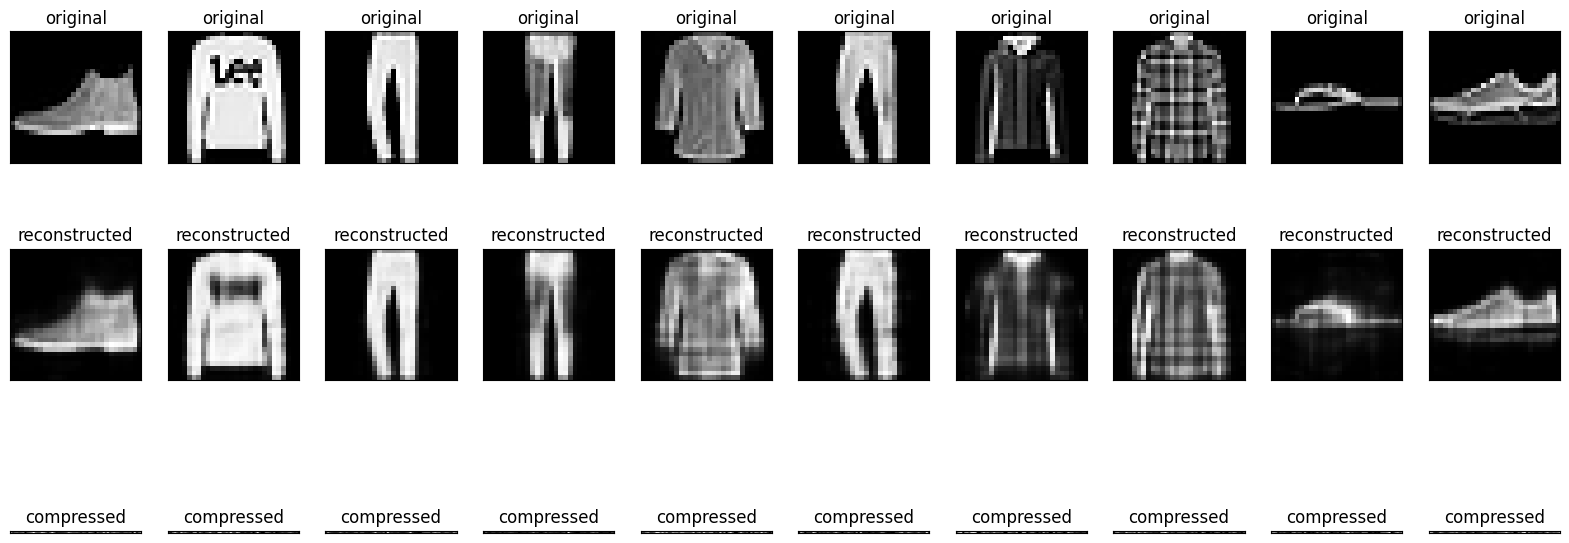

In [9]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  ax = plt.subplot(3, n, i + 1 + n + n)
  plt.imshow(encoded_imgs[i][np.newaxis])
  plt.title("compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

- 객체로 표현
- 고유한 특성을 뽑아서 복원하면서 노이즈 제거

In [10]:
# 랜덤하게 노이즈 추가
noise_factor = 0.2  # 노이즈 정도
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)   #이미지에 랜덤값에 노이즈 정도를 곱해서 더해서 추가
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

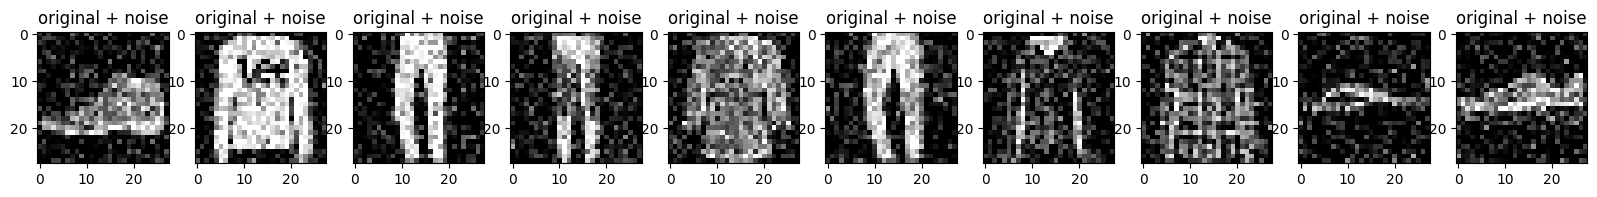

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [12]:
autoencoder3 = AutoEncoder(latent_dim)
autoencoder3.compile(optimizer='adam',loss='mean_squared_error')
autoencoder3.fit(x_train_noisy,x_train,epochs=10,shuffle=True,
                validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0411 - val_loss: 0.0168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0155 - val_loss: 0.0135
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0131 - val_loss: 0.0126
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0124 - val_loss: 0.0123
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0121 - val_loss: 0.0122
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0118 - val_loss: 0.0119
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0118 - val_loss: 0.0119


In [13]:
encoded_imgs = autoencoder3.encoder(x_test).numpy()
decoded_imgs = autoencoder3.decoder(encoded_imgs).numpy()

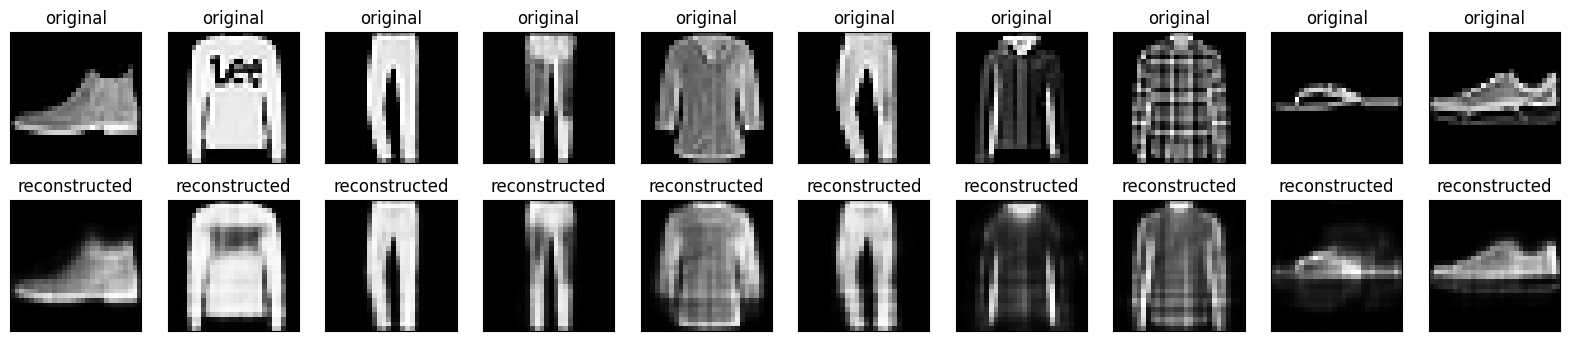

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
autoencoder3.summary()

Model: "auto_encoder_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (32, 64)                    │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (32, 28, 28)                │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303,602 (1.16 MB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 202,402 (790.64 KB)

### Convolutional Autoencoder
- 이미지에 사용하는 autoencoder 성능 개선

- pooling 대신에 stride이용해서 sampling

### convolution
- deconvolution
  - convolution 과정을 반대로함
- Upsampling2D
  - bilinear, nearest 기반 interpolation으로 resize로 늘림
- Conv2DTranspose
  - 축약된 값을 다시 복원하는것을 **학습을 통해서** 가장 비슷한 값 찾음
  - Conv2D 반대로 축소된것을 복원하는 방법

> - dilated convolution(묽은)
      - `tf.keras.layers.Conv2D(dialtion_rate = )`
      - convolution 할때 촘촘하게가 하지 않아서 확장됨
      - segmentation: 빠르게 찾음

In [16]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis] # 흑백 이미지 차원 추가
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

# 노이츠 추가
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

(60000, 28, 28, 1)


In [17]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),

      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),  # pooling 대체
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),# Upsamling2D -> Conv2DTranspose
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      #1 : 크기 맞추기 원본 -> 원본
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [18]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error')
autoencoder.fit(x_train_noisy,x_train,epochs=10,shuffle=True,
                validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0327 - val_loss: 0.0099
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0074 - val_loss: 0.0074


In [19]:
encoded_imgs = autoencoder.encoder(x_test).numpy() #객체내에서 모델로 분리되어있어서 사용 가
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

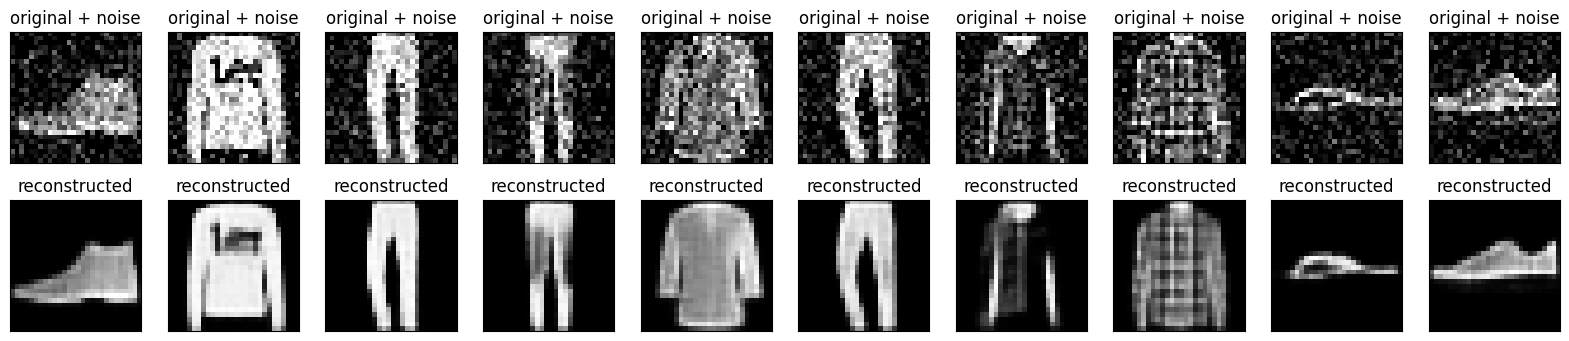

In [20]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### Generative Adversarial Network
> - knowledge distillation(2015)
  - teacher model -> studnet model에세 '필요한 지식만 전달'해서 간단한 모델에서도 복잡한 모델만큼 특정 태스크에 성능 좋음(조력자의 도움)


- Generator : 위조지폐범이 위조 지폐를 만들면 감별사가 감별해서 왜 위조인지 알려주어서 변형 시켜서 다시 감별받음을 반복해서 위조지폐범의 위조 지폐가 감별사를 속일만한 정도에 이르게됨
    - 가짜데이터를 만듦
- Discriminator : 동시에 감별사는 감별능력을 다시 키우기 위해서 위조인데 못맞춘것을 피드백 받아서 위조 감별 능력 키워서 못 맞춘것도 가능해짐



- 적대적인 경쟁을 통해서 학습 능력 향상: self-suprevised learning  핵심
- GAN 학습이 잘 안되어서(underfitting) learning technique 중요

Generator
- 가짜 mnist 데이터 만듦

In [21]:
generator = tf.keras.models.Sequential([
          tf.keras.layers.Dense(256, input_shape=(200,),activation='relu'),
          tf.keras.layers.Dense(512,activation='relu'),
          tf.keras.layers.Dense(784,activation='relu')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Discriminator
- 가짜 데이터 구분

In [22]:
#학습해서 능력 키움  ; 학습을 못하게 할수 있음
discriminator = tf.keras.models.Sequential([
                      tf.keras.layers.Dense(1024,input_shape=(784,),activation='relu'),
                      tf.keras.layers.Dense(512,activation='relu'),
                      tf.keras.layers.Dense(256,activation='relu'),


                      tf.keras.layers.Dense(1,activation='sigmoid') # 진짜/가짜 판별
])

In [23]:
#각자의 학습 전략
generator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

동시에 학습하는것이 아닌 generator 먼저 학습 시킴

In [24]:
discriminator.trainable = False  # 학습 못하게함

전체 하나의 모델

In [25]:
gan_input = tf.keras.Input(shape=(200,))

x = generator(gan_input)
gan_output = discriminator(x)

In [26]:
gan = tf.keras.models.Model(gan_input,gan_output)
gan.compile(loss='binary_cross_entropy',optimizer='adam')

In [27]:
gan.summary()  # generator : 200 --> 784 , discriminator: 784 --> 1

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_8 (Sequential)            │ (None, 784)                 │         585,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (None, 1)                   │       1,460,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,045,457 (7.80 MB)

 Trainable params: 585,232 (2.23 MB)

 Non-trainable params: 1,460,225 (5.57 MB)

In [28]:
# 200개 데이터 100개
import numpy as np
sample=np.random.random((100,200))   #이미지에 랜덤값에 노이즈 정도를 곱해서 더해서 추가
len(np.random.random((100,200)) ) #(100,200)

100

In [29]:
generator(sample)  # 출력 : (100,784)

<tf.Tensor: shape=(100, 784), dtype=float32, numpy=
array([[0.02317645, 0.05626488, 0.02485338, ..., 0.7789104 , 0.        ,
        0.19100024],
       [0.18292156, 0.16565177, 0.        , ..., 0.76551586, 0.        ,
        0.28650773],
       [0.23540756, 0.        , 0.        , ..., 0.7127807 , 0.        ,
        0.27914685],
       ...,
       [0.06315754, 0.18647262, 0.        , ..., 0.56820273, 0.02149475,
        0.13375278],
       [0.19725208, 0.07183549, 0.        , ..., 0.8004865 , 0.05379906,
        0.0172912 ],
       [0.1259952 , 0.16785684, 0.        , ..., 0.67613065, 0.        ,
        0.19967714]], dtype=float32)>

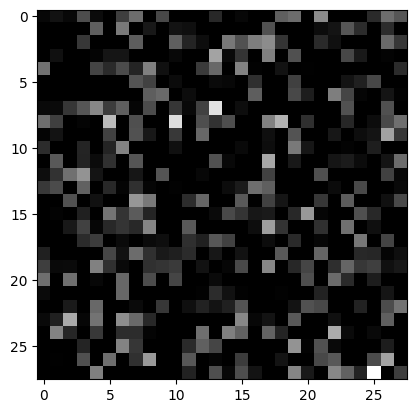

In [30]:
import matplotlib.pyplot as plt

plt.imshow( generator(sample)[0].numpy().reshape(28,28)) # 가짜 데이터 생성

In [31]:
discriminator(generator(sample))  # 출력 :(100,1), 모두 .5 안팎

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.48457748],
       [0.48507753],
       [0.4945439 ],
       [0.49207887],
       [0.49988124],
       [0.49107805],
       [0.4992507 ],
       [0.49839264],
       [0.49085543],
       [0.5034077 ],
       [0.47804743],
       [0.48940754],
       [0.5014754 ],
       [0.50447565],
       [0.5065346 ],
       [0.49779457],
       [0.49907225],
       [0.50414765],
       [0.48887572],
       [0.4933191 ],
       [0.5145494 ],
       [0.49114498],
       [0.49772656],
       [0.5008644 ],
       [0.5046695 ],
       [0.4950391 ],
       [0.49674284],
       [0.5101255 ],
       [0.49544927],
       [0.4960403 ],
       [0.49439   ],
       [0.5110503 ],
       [0.5006534 ],
       [0.49974668],
       [0.49764726],
       [0.50856626],
       [0.5137544 ],
       [0.5017769 ],
       [0.5005053 ],
       [0.49315894],
       [0.50302905],
       [0.4896932 ],
       [0.5028317 ],
       [0.5016397 ],
       [0.49521992],
     

###  데이터

In [32]:
#진짜 데이터
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.mnist.load_data() #0-9까지 데이터를 만듦.
x_train = x_train.reshape(-1,28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
x_train.shape

(60000, 784)

- batch size 크기에 따라 메모리, 학습 속도 trade-off

In [34]:
#batch size만큼 학습 시킬 예정
batchsize=x_train.shape[0]//128  # 60000/128 = 468.75
batchsize

468

In [35]:
fake=np.random.normal(0,1,size=[batchsize,200]) # normal dist ( 0,1) 200개짜리 batch size만큼 있음
fake.shape

(468, 200)

(468, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
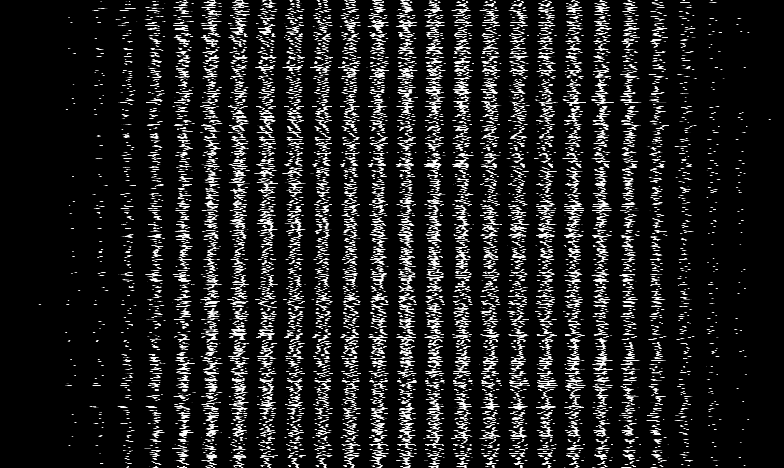

In [36]:
image_batch=x_train[np.random.randint(0, x_train.shape[0],size=batchsize)] #랜덤하게
print(image_batch.shape) # (468, 784)
image_batch

In [37]:
generator(fake).shape

TensorShape([468, 784])

### 학습데이터 구축
- 가짜데이터 진짜데이터 합치기

In [38]:
x = np.concatenate([image_batch,generator(fake)])

In [39]:
x.shape  # (936,784)

(936, 784)

In [40]:
y = np.zeros(2*batchsize)
y.shape  # 936

(936,)

In [41]:
y[:batchsize] = 0.9  # image_batch 90%로 진짜, generator(fake) 0%(가짜)

#### train_on_batch
- fit은 전체를 하기때문에 batch size 만큼 학습

In [42]:
discriminator.trainable=True #학습 시키도록 함

In [43]:
discriminator.train_on_batch(x,y)

array(12.31864, dtype=float32)

In [44]:
discriminator.train_on_batch(x,y)

array(20.4805, dtype=float32)

In [45]:
discriminator.trainable=False #학습 안 시킴

In [46]:
generator.trainable=True

In [47]:
y_gen = np.ones(batchsize) # 학습 목표 = 1:진짜 데이터라고 가정해야함

In [48]:
fake=np.random.normal(0,1,size=[batchsize,200])

결과를 보면 학습이 잘 되지 않음.
- GAN학습이 안되는 것은  ReLU사용한 경우 0에 가까운 값은 0 가까이 전달됨
- underfitting 문제로 LeackyReLU  (1/1000 x,x) 좀 더 잘됨

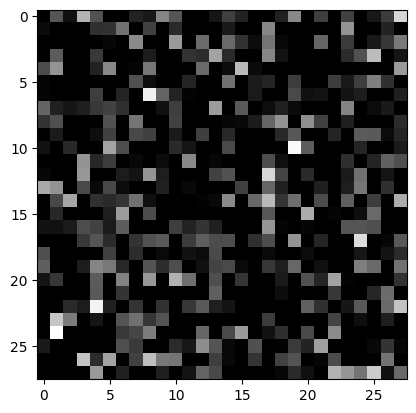

In [49]:
plt.imshow(generator(fake)[10].numpy().reshape(28,28))